Membaca dan Menampilkan Data | 1

In [1]:
#meng-import library pandas, library ini dapat kita gunakan untuk membaca data dalam format excel
import pandas as pd
pd.set_option('display.max_column', 20)

#men-load file churn_analysis_train.xlsx sebagai pandas data frame untuk mempermudah proses pengolahan data
df = pd.read_excel('https://storage.googleapis.com/dqlab-dataset/cth_churn_analysis_train.xlsx')

#perintah untuk menampilkan 5 data pertama
print(df.head())

  ID_Customer Jenis_kelamin  umur  membership_program using_reward  \
0   1005-CTMP     Perempuan    41                  36           No   
1   1007-STSJ     Laki-laki    27                  36          Yes   
2   1012-NCGH     Laki-laki    45                  36           No   
3   1014-WWBN     Perempuan    33                  12           No   
4   1024-HYUA     Perempuan    38                  12           No   

      pembayaran Subscribe_brochure  harga_per_bulan  jumlah_harga_langganan  \
0           Cash                 No            10000                  360000   
1  Bank Transfer              Email            10000                  360000   
2           Cash                 No            10000                  360000   
3  Bank Transfer                Yes            10000                  120000   
4           Cash                 No            10000                  120000   

  churn  
0   Yes  
1   Yes  
2    No  
3    No  
4    No  


Mengubah Kolom Non-Numerik Menjadi Kolom Numerik | 2

In [2]:
#Kode program sebelumnya
import pandas as pd
pd.set_option('display.max_column', 20)

df = pd.read_excel('https://storage.googleapis.com/dqlab-dataset/cth_churn_analysis_train.xlsx')

#menghilangkan kolom id dari data frame dikarenakan kolom id tidak relevan untuk dijadikan input ataupun output dalam tugas klasifikasi
df.drop('ID_Customer', axis=1, inplace=True)

#mengubah nilai "Perempuan" menjadi 1 dan "Laki-laki" menjadi 0
df['Jenis_kelamin']= df['Jenis_kelamin'].map(
	lambda value: 1 if value == 'Perempuan' else 0)

#mengubah nilai using_reward "Yes" menjadi 1 dan "No" menjadi 0
df['using_reward']= df['using_reward'].map(
	lambda value: 1 if value == 'Yes' else 0)

#mengubah nilai pembayaran "Credit" menjadi 2, "Bank Transfer" menjadi 1 dan "Cash" menjadi 0
df['pembayaran']= df['pembayaran'].map(
    lambda value: 2 if value == 'Credit'
    else 1 if value == 'Bank Transfer'
    else 0)

#mengubah nilai subskripsi brosur "No" menjadi 0 dan nilai lainnya ("Email" dan "Yes") menjadi 1
df['Subscribe_brochure']= df['Subscribe_brochure'].map(
    lambda value: 0 if value == 'No'  else 1)

#mengubah nilai "Yes" menjadi 1 dan "No" menjadi 0
df['churn'] = df['churn'].map(
	lambda value: 1 if value == 'Yes' else 0)

#menampilkan isi dari variabel 'df' setelah perubahan
print(df.head())

   Jenis_kelamin  umur  membership_program  using_reward  pembayaran  \
0              1    41                  36             0           0   
1              0    27                  36             1           1   
2              0    45                  36             0           0   
3              1    33                  12             0           1   
4              1    38                  12             0           0   

   Subscribe_brochure  harga_per_bulan  jumlah_harga_langganan  churn  
0                   0            10000                  360000      1  
1                   1            10000                  360000      1  
2                   0            10000                  360000      0  
3                   1            10000                  120000      0  
4                   0            10000                  120000      0  


Feature Matrix dan Target | 3

In [3]:
#Kode program sebelumnya
import pandas as pd
pd.set_option('display.max_column', 20)

df = pd.read_excel('https://storage.googleapis.com/dqlab-dataset/cth_churn_analysis_train.xlsx')

df.drop('ID_Customer', axis=1, inplace=True)

df['Jenis_kelamin']= df['Jenis_kelamin'].map(
   lambda value: 1 if value == 'Perempuan' else 0)

df['using_reward']= df['using_reward'].map(
   lambda value: 1 if value == 'Yes' else 0)

df['pembayaran']= df['pembayaran'].map(
    lambda value: 2 if value == 'Credit'
    else 1 if value == 'Bank Transfer'
    else 0)

df['Subscribe_brochure']= df['Subscribe_brochure'].map(
    lambda value: 0 if value == 'No'  else 1)

df['churn'] = df['churn'].map(
   lambda value: 1 if value == 'Yes' else 0)

#menyimpan atribut diagnosis ke dalam variabel y dan disimpan ke dalam array 1D atau array target
y = df.pop('churn').to_numpy()

#mengubah seluruh data dalam df ke dalam format array 2D atau matrix feature X (jumlah data, jumlah atribut)
X = df.to_numpy()

#memastikan jumlah data dan jumlah atribut data input
print('X:', X.shape)
#memastikan jumlah data pada variabel y
print('y:', y.shape)

X: (499, 8)
y: (499,)


Akurasi Data Training | 4

In [1]:
#Kode program sebelumnya
import pandas as pd
pd.set_option('display.max_column', 20)

df = pd.read_excel('https://storage.googleapis.com/dqlab-dataset/cth_churn_analysis_train.xlsx')

df.drop('ID_Customer', axis=1, inplace=True)

df['Jenis_kelamin']= df['Jenis_kelamin'].map(
   lambda value: 1 if value == 'Perempuan' else 0)

df['using_reward']= df['using_reward'].map(
   lambda value: 1 if value == 'Yes' else 0)

df['pembayaran']= df['pembayaran'].map(
    lambda value: 2 if value == 'Credit'
    else 1 if value == 'Bank Transfer'
    else 0)

df['Subscribe_brochure']= df['Subscribe_brochure'].map(
    lambda value: 0 if value == 'No'  else 1)

df['churn'] = df['churn'].map(
    lambda value: 1 if value == 'Yes' else 0)

y = df.pop('churn').to_numpy()

X = df.to_numpy()

#mengimport model 'DecisionTreeClassifier' dari library scikit-learn tepatnya dari modul tree.
from sklearn.tree import DecisionTreeClassifier

#inisialisasi model
model = DecisionTreeClassifier(random_state=12)

#melatih model berdasarkan data input (X) dan label (y)
model.fit(X, y)

#melakukan prediksi terhadap setiap data dalam X dan menyimpan hasil prediksi dalam array 'y_pred'
y_pred = model.predict(X)

#mengimport fungsi untuk menghitung akurasi dari library scikit-learn tepatnya dari modul metrics.
from sklearn.metrics import accuracy_score

#menghitung nilai akurasi dari hasil prediksi (y_pred) dengan label aktual yang dimiliki oleh setiap data (y) nilai akurasi dihitung dengan menggunakan total prediksi benar dibagi dengan total data yang diprediksi
score = accuracy_score(y,y_pred)

#menampilkan hasil akurasi dalam persen
print('Hasil akurasi model: %.2f %%' % (100*score))

Hasil akurasi model: 90.78 %


Train and Test Split - Praktikum | 5

In [2]:
#Kode program sebelumnya
import pandas as pd
pd.set_option('display.max_column', 20)

df = pd.read_excel('https://storage.googleapis.com/dqlab-dataset/cth_churn_analysis_train.xlsx')

df.drop('ID_Customer', axis=1, inplace=True)

df['Jenis_kelamin']= df['Jenis_kelamin'].map(
   lambda value: 1 if value == 'Perempuan' else 0)

df['using_reward']= df['using_reward'].map(
   lambda value: 1 if value == 'Yes' else 0)

df['pembayaran']= df['pembayaran'].map(
    lambda value: 2 if value == 'Credit'
    else 1 if value == 'Bank Transfer'
    else 0)

df['Subscribe_brochure']= df['Subscribe_brochure'].map(
    lambda value: 0 if value == 'No'  else 1)

df['churn'] = df['churn'].map(
    lambda value: 1 if value == 'Yes' else 0)

y = df.pop('churn').to_numpy()

X = df.to_numpy()

#fungsi untuk membagi data dan label ke dalam dua bagian (data latih dan data testing) secara acak tersedia dalam library scikit-learn.model_selection
from sklearn.model_selection import train_test_split

#X_train dan y_train akan kita gunakan sebagai data untuk melatih model X_test dan y_test akan kita gunakan sebagai data testing untuk mengetahui kemampuan model untuk data yang belum pernah ia jumpai
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=12)

#melatih model berdasarkan data latih (X_train) dan labelnya (y_train)
model.fit(X_train,y_train)

#melakukan prediksi terhadap setiap data testing (X_test) dan menyimpan hasil prediksi dalam array 'y_pred'
y_pred = model.predict(X_test)

#mengimport fungsi untuk menghitung akurasi dari library scikit-learn tepatnya dari modul metrics.
from sklearn.metrics import accuracy_score

#menghitung nilai akurasi dari hasil prediksi (y_pred) dengan label aktual yang dimiliki oleh setiap data test (y_test)
score = accuracy_score(y_test,y_pred)

#menampilkan hasil akurasi dalam persen
print('Hasil akurasi model: %.2f %%' % (100*score))

Hasil akurasi model: 46.00 %


K-Fold Cross Validation - Praktikum | 6

In [3]:
#Kode program sebelumnya
import pandas as pd
pd.set_option('display.max_column', 20)

df = pd.read_excel('https://storage.googleapis.com/dqlab-dataset/cth_churn_analysis_train.xlsx')

df.drop('ID_Customer', axis=1, inplace=True)

df['Jenis_kelamin']= df['Jenis_kelamin'].map(
   lambda value: 1 if value == 'Perempuan' else 0)

df['using_reward']= df['using_reward'].map(
   lambda value: 1 if value == 'Yes' else 0)

df['pembayaran']= df['pembayaran'].map(
    lambda value: 2 if value == 'Credit'
    else 1 if value == 'Bank Transfer'
    else 0)

df['Subscribe_brochure']= df['Subscribe_brochure'].map(
    lambda value: 0 if value == 'No'  else 1)

df['churn'] = df['churn'].map(
    lambda value: 1 if value == 'Yes' else 0)

y = df.pop('churn').to_numpy()
X = df.to_numpy()

#mengimport fungsi K-Fold dari modul model_selection pada library scikit-learn
from sklearn.model_selection import KFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#men-set nilai K = 10
kf = KFold(n_splits= 10, shuffle=True,random_state = 12)

#menyesuaikan nilai K dengan jumlah data pada variabel X
kf.get_n_splits(X)

#mengulangi proses pelatihan dan evaluasi pada setiap kelompok data yang telah dibagi melalui object KFold
for train_index, test_index in kf.split(X):
	X_train, X_test = X[train_index], X[test_index]
	y_train, y_test = y[train_index], y[test_index]
	model = DecisionTreeClassifier(random_state=12)
	model.fit(X_train,y_train)

	y_pred = model.predict(X_test)
	score = accuracy_score(y_test,y_pred)

	print('Hasil akurasi model: %.2f %%' % (100*score))

Hasil akurasi model: 56.00 %
Hasil akurasi model: 56.00 %
Hasil akurasi model: 54.00 %
Hasil akurasi model: 34.00 %
Hasil akurasi model: 56.00 %
Hasil akurasi model: 48.00 %
Hasil akurasi model: 44.00 %
Hasil akurasi model: 56.00 %
Hasil akurasi model: 60.00 %
Hasil akurasi model: 42.86 %


Akurasi Rata-Rata Model Klasifikasi | 7

In [4]:
#Kode program sebelumnya
import pandas as pd
pd.set_option('display.max_column', 20)

df = pd.read_excel('https://storage.googleapis.com/dqlab-dataset/cth_churn_analysis_train.xlsx')

df.drop('ID_Customer', axis=1, inplace=True)

df['Jenis_kelamin']= df['Jenis_kelamin'].map(
   lambda value: 1 if value == 'Perempuan' else 0)

df['using_reward']= df['using_reward'].map(
   lambda value: 1 if value == 'Yes' else 0)

df['pembayaran']= df['pembayaran'].map(
    lambda value: 2 if value == 'Credit'
    else 1 if value == 'Bank Transfer'
    else 0)

df['Subscribe_brochure']= df['Subscribe_brochure'].map(
    lambda value: 0 if value == 'No'  else 1)

df['churn'] = df['churn'].map(
    lambda value: 1 if value == 'Yes' else 0)

y = df.pop('churn').to_numpy()
X = df.to_numpy()

#mengimport fungsi KFold dari modul model_selection pada library scikit-learn
from sklearn.model_selection import KFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#men-set nilai K = 10
kf = KFold(n_splits= 10, shuffle=True,random_state = 12)

#menyesuaikan nilai K dengan jumlah data pada variabel X
kf.get_n_splits(X)

total_score = 0

#mengulangi proses pelatihan dan evaluasi pada setiap kelompok data yang telah dibagi melalui object KFold
for train_index, test_index in kf.split(X):
	X_train, X_test = X[train_index], X[test_index]
	y_train, y_test = y[train_index], y[test_index]

	model = DecisionTreeClassifier(random_state=12)
	model.fit(X_train,y_train)

	y_pred = model.predict(X_test)
	score = accuracy_score(y_test,y_pred)

	total_score += score
	print('Hasil akurasi model: %.2f %%' % (100*score))

print('\nRata-rata akurasi model: %.2f %%' % (100*total_score/10))

Hasil akurasi model: 56.00 %
Hasil akurasi model: 56.00 %
Hasil akurasi model: 54.00 %
Hasil akurasi model: 34.00 %
Hasil akurasi model: 56.00 %
Hasil akurasi model: 48.00 %
Hasil akurasi model: 44.00 %
Hasil akurasi model: 56.00 %
Hasil akurasi model: 60.00 %
Hasil akurasi model: 42.86 %

Rata-rata akurasi model: 50.69 %


Confusion Matrix - Praktikum | 8

In [5]:
#Kode program sebelumnya
import pandas as pd
pd.set_option('display.max_column', 20)

df = pd.read_excel('https://storage.googleapis.com/dqlab-dataset/cth_churn_analysis_train.xlsx')

df.drop('ID_Customer', axis=1, inplace=True)

df['Jenis_kelamin']= df['Jenis_kelamin'].map(
   lambda value: 1 if value == 'Perempuan' else 0)

df['using_reward']= df['using_reward'].map(
   lambda value: 1 if value == 'Yes' else 0)

df['pembayaran']= df['pembayaran'].map(
    lambda value: 2 if value == 'Credit'
    else 1 if value == 'Bank Transfer'
    else 0)

df['Subscribe_brochure']= df['Subscribe_brochure'].map(
    lambda value: 0 if value == 'No'  else 1)

df['churn'] = df['churn'].map(
    lambda value: 1 if value == 'Yes' else 0)

y = df.pop('churn').to_numpy()
X = df.to_numpy()

from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier

#library yang dapat kita gunakan untuk menghitung nilai confusion matrix
from sklearn.metrics import confusion_matrix

kf = KFold(n_splits=10, shuffle=True, random_state=12)

kf.get_n_splits(X)

#menyiapkan array berukuran 2 * 2 untuk  menyimpan informasi confusion matrix
import numpy as np
cm_result = np.zeros((2,2))
for train_index,test_index in kf.split(X):
	X_train, X_test = X[train_index], X[test_index]
	y_train, y_test = y[train_index], y[test_index]

	model = DecisionTreeClassifier(random_state=12)
	model.fit(X_train,y_train)

	y_pred = model.predict(X_test)

	#menghitung nilai confusion matrix berdasarkan label sebenarnya dan label hasil prediksi model
	cm_result += confusion_matrix(y_test, y_pred)

print('Confusion Matrix untuk K-Fold = 10')
print(cm_result)

Confusion Matrix untuk K-Fold = 10
[[125. 112.]
 [134. 128.]]


Precision, Recall, dan F1-Score - Praktikum | 9

In [6]:
#Kode program sebelumnya
import pandas as pd
pd.set_option('display.max_column', 20)

df = pd.read_excel('https://storage.googleapis.com/dqlab-dataset/cth_churn_analysis_train.xlsx')

df.drop('ID_Customer', axis=1, inplace=True)

df['Jenis_kelamin']= df['Jenis_kelamin'].map(
   lambda value: 1 if value == 'Perempuan' else 0)

df['using_reward']= df['using_reward'].map(
   lambda value: 1 if value == 'Yes' else 0)

df['pembayaran']= df['pembayaran'].map(
    lambda value: 2 if value == 'Credit'
    else 1 if value == 'Bank Transfer'
    else 0)

df['Subscribe_brochure']= df['Subscribe_brochure'].map(
    lambda value: 0 if value == 'No'  else 1)

df['churn'] = df['churn'].map(
    lambda value: 1 if value == 'Yes' else 0)

y = df.pop('churn').to_numpy()
X = df.to_numpy()

#library yang dapat kita gunakan untuk menghitung nilai precision, recall dan F1-Score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier

#library yang dapat kita gunakan untuk menghitung nilai precision, recall dan F1-Score
from sklearn.metrics import classification_report

kf = KFold(n_splits=10, shuffle=True, random_state=12)

kf.get_n_splits(X)

#variabel untuk menyimpan label ground-truth atau label referensi dari setiap iterasi
y_true_all = []

#variabel untuk menyimpan label hasil prediksi dari setiap iterasi
y_pred_all = []

for train_index, test_index in kf.split(X):
	X_train, X_test = X[train_index], X[test_index]
	y_train, y_test = y[train_index], y[test_index]

	model = DecisionTreeClassifier(random_state=12)
	model.fit(X_train,y_train)

	y_pred = model.predict(X_test)

	#menambahkan label ground_truth ke dalam variabel
	y_true_all.extend(y_test)
	#menambahkan label prediksi ke dalam variabel
	y_pred_all.extend(y_pred)

print(classification_report(y_true_all, y_pred_all))

              precision    recall  f1-score   support

           0       0.48      0.53      0.50       237
           1       0.53      0.49      0.51       262

    accuracy                           0.51       499
   macro avg       0.51      0.51      0.51       499
weighted avg       0.51      0.51      0.51       499



Precision & Recall Trade off - Praktikum | 10

In [7]:
#Kode program sebelumnya
import pandas as pd
pd.set_option('display.max_column', 20)

df = pd.read_excel('https://storage.googleapis.com/dqlab-dataset/cth_churn_analysis_train.xlsx')

df.drop('ID_Customer', axis=1, inplace=True)

df['Jenis_kelamin']= df['Jenis_kelamin'].map(
   lambda value: 1 if value == 'Perempuan' else 0)

df['using_reward']= df['using_reward'].map(
   lambda value: 1 if value == 'Yes' else 0)

df['pembayaran']= df['pembayaran'].map(
    lambda value: 2 if value == 'Credit'
    else 1 if value == 'Bank Transfer'
    else 0)

df['Subscribe_brochure']= df['Subscribe_brochure'].map(
    lambda value: 0 if value == 'No'  else 1)

df['churn'] = df['churn'].map(
    lambda value: 1 if value == 'Yes' else 0)

y = df.pop('churn').to_numpy()
X = df.to_numpy()

from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier

#library yang dapat kita gunakan untuk menghitung nilai precision recall trade-off
from sklearn.metrics import precision_recall_curve

kf = KFold(n_splits=10, shuffle=True, random_state=12)
kf.get_n_splits(X)

#variabel untuk menyimpan label ground-truth atau label referensi dari setiap iterasi
y_true_all = []

#variabel untuk menyimpan label hasil prediksi dari setiap iterasi
y_pred_all = []

for train_index, test_index in kf.split(X):
	X_train, X_test = X[train_index], X[test_index]
	y_train, y_test = y[train_index], y[test_index]

	model = DecisionTreeClassifier(random_state=12)
	model.fit(X_train,y_train)

	y_pred = model.predict_proba(X_test)

	#menambahkan label ground_truth ke dalam variabel
	y_true_all.extend(y_test)
	#menambahkan label prediksi ke dalam variabel
	y_pred_all.extend(y_pred[:,1])

precisions, recalls, thresholds = precision_recall_curve(y_true_all, y_pred_all)

#mengiterasi setiap nilai threshold, precision dan recall yang dihasilkan oleh fungsi precision_recall_curve
for i in range(0,len(thresholds)):
	print('Saat nilai threshold: %.2f maka nilai Precision: %.2f dan Recall: %.2f' % (thresholds[i], precisions[i], recalls[i]))

Saat nilai threshold: 0.00 maka nilai Precision: 0.53 dan Recall: 1.00
Saat nilai threshold: 0.33 maka nilai Precision: 0.52 dan Recall: 0.56
Saat nilai threshold: 0.50 maka nilai Precision: 0.52 dan Recall: 0.56
Saat nilai threshold: 0.67 maka nilai Precision: 0.53 dan Recall: 0.49
Saat nilai threshold: 1.00 maka nilai Precision: 0.53 dan Recall: 0.48


Visualisasi Precision & Recall Trade off | 11

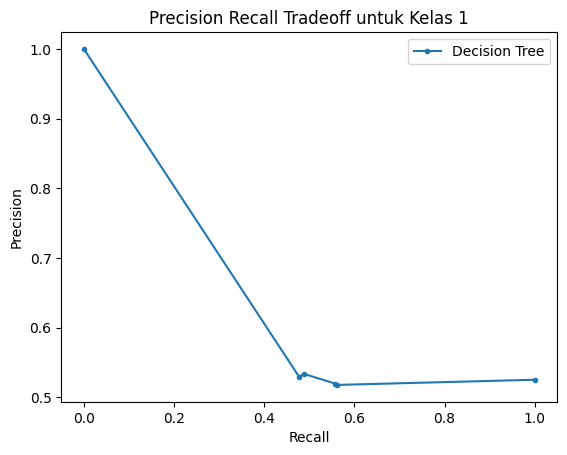

In [8]:
#Kode program sebelumnya
import pandas as pd
pd.set_option('display.max_column', 20)

df = pd.read_excel('https://storage.googleapis.com/dqlab-dataset/cth_churn_analysis_train.xlsx')

df.drop('ID_Customer', axis=1, inplace=True)

df['Jenis_kelamin']= df['Jenis_kelamin'].map(
   lambda value: 1 if value == 'Perempuan' else 0)

df['using_reward']= df['using_reward'].map(
   lambda value: 1 if value == 'Yes' else 0)

df['pembayaran']= df['pembayaran'].map(
    lambda value: 2 if value == 'Credit'
    else 1 if value == 'Bank Transfer'
    else 0)

df['Subscribe_brochure']= df['Subscribe_brochure'].map(
    lambda value: 0 if value == 'No'  else 1)

df['churn'] = df['churn'].map(
    lambda value: 1 if value == 'Yes' else 0)

y = df.pop('churn').to_numpy()
X = df.to_numpy()

from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve

kf = KFold(n_splits=10, shuffle=True, random_state=12)
kf.get_n_splits(X)

y_true_all = []
y_pred_all = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = DecisionTreeClassifier(random_state=12)
    model.fit(X_train,y_train)

    y_pred = model.predict_proba(X_test)

    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred[:,1])

precisions, recalls, thresholds = precision_recall_curve(y_true_all, y_pred_all)

import matplotlib.pyplot as plt

plt.plot(recalls, precisions, marker='.', label='Decision Tree')

#axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title("Precision Recall Tradeoff untuk Kelas 1")

#show the legend
plt.legend()

#show the plot
plt.show()

Matthews Correlation Coefficient - Praktikum | 12

In [9]:
#Kode program sebelumnya
import pandas as pd
pd.set_option('display.max_column', 20)

df = pd.read_excel('https://storage.googleapis.com/dqlab-dataset/cth_churn_analysis_train.xlsx')

df.drop('ID_Customer', axis=1, inplace=True)

df['Jenis_kelamin']= df['Jenis_kelamin'].map(
   lambda value: 1 if value == 'Perempuan' else 0)

df['using_reward']= df['using_reward'].map(
   lambda value: 1 if value == 'Yes' else 0)

df['pembayaran']= df['pembayaran'].map(
    lambda value: 2 if value == 'Credit'
    else 1 if value == 'Bank Transfer'
    else 0)

df['Subscribe_brochure']= df['Subscribe_brochure'].map(
    lambda value: 0 if value == 'No'  else 1)

df['churn'] = df['churn'].map(
    lambda value: 1 if value == 'Yes' else 0)

y = df.pop('churn').to_numpy()
X = df.to_numpy()

from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier

#library yang dapat kita gunakan untuk menghitung nilai Matthews Correlation Coefficient
from sklearn.metrics import matthews_corrcoef

kf = KFold(n_splits=10, shuffle=True, random_state=12)
kf.get_n_splits(X)

#variabel untuk menyimpan label ground-truth atau label referensi dari setiap iterasi
y_true_all = []

#variabel untuk menyimpan label hasil prediksi dari setiap iterasi
y_pred_all = []

for train_index, test_index in kf.split(X):
	X_train, X_test = X[train_index], X[test_index]
	y_train, y_test = y[train_index], y[test_index]

	model = DecisionTreeClassifier(random_state=12)
	model.fit(X_train,y_train)

	y_pred = model.predict(X_test)

	#menambahkan label ground_truth ke dalam variabel
	y_true_all.extend(y_test)
	#menambahkan label prediksi ke dalam variabel
	y_pred_all.extend(y_pred)

print('Nilai MCC: ', matthews_corrcoef(y_true_all, y_pred_all))

Nilai MCC:  0.015967295055970186


Mini Project: Train dan Test Split

In [10]:
#Kode program sebelumnya
import pandas as pd
pd.set_option('display.max_column', 20)

df = pd.read_excel('https://storage.googleapis.com/dqlab-dataset/cth_churn_analysis_train.xlsx')

df.drop('ID_Customer', axis=1, inplace=True)

df['Jenis_kelamin']= df['Jenis_kelamin'].map(
   lambda value: 1 if value == 'Perempuan' else 0)

df['using_reward']= df['using_reward'].map(
   lambda value: 1 if value == 'Yes' else 0)

df['pembayaran']= df['pembayaran'].map(
    lambda value: 2 if value == 'Credit'
    else 1 if value == 'Bank Transfer'
    else 0)

df['Subscribe_brochure']= df['Subscribe_brochure'].map(
    lambda value: 0 if value == 'No'  else 1)

df['churn'] = df['churn'].map(
    lambda value: 1 if value == 'Yes' else 0)

y = df.pop('churn').to_numpy()

X = df.to_numpy()

#fungsi untuk membagi data dan label ke dalam dua bagian (data latih dan data testing) secara acak tersedia dalam library scikit-learn.model_selection
from sklearn.model_selection import train_test_split

#X_train dan y_train akan kita gunakan sebagai data untuk melatih model X_test dan y_test akan kita gunakan sebagai data testing untuk mengetahui kemampuan model untuk data yang belum pernah ia jumpai
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12)

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=12)

#melatih model berdasarkan data latih (X_train) dan labelnya (y_train)
model.fit(X_train,y_train)

#melakukan prediksi terhadap setiap data testing (X_test) dan menyimpan hasil prediksi dalam array 'y_pred'
y_pred = model.predict(X_test)

#mengimport fungsi untuk menghitung akurasi dari library scikit-learn tepatnya dari modul metrics.
from sklearn.metrics import accuracy_score

#menghitung nilai akurasi dari hasil prediksi (y_pred) dengan label aktual yang dimiliki oleh setiap data test (y_test)
score = accuracy_score(y_test,y_pred)

#menampilkan hasil akurasi dalam persen
print('Hasil akurasi model: %.2f %%' % (100*score))

Hasil akurasi model: 56.00 %


Mini Project: K-Fold Cross Validation

In [11]:
#Kode program sebelumnya
import pandas as pd
pd.set_option('display.max_column', 20)

df = pd.read_excel('https://storage.googleapis.com/dqlab-dataset/cth_churn_analysis_train.xlsx')

df.drop('ID_Customer', axis=1, inplace=True)

df['Jenis_kelamin']= df['Jenis_kelamin'].map(
   lambda value: 1 if value == 'Perempuan' else 0)

df['using_reward']= df['using_reward'].map(
   lambda value: 1 if value == 'Yes' else 0)

df['pembayaran']= df['pembayaran'].map(
    lambda value: 2 if value == 'Credit'
    else 1 if value == 'Bank Transfer'
    else 0)

df['Subscribe_brochure']= df['Subscribe_brochure'].map(
    lambda value: 0 if value == 'No'  else 1)

df['churn'] = df['churn'].map(
    lambda value: 1 if value == 'Yes' else 0)

y = df.pop('churn').to_numpy()
X = df.to_numpy()

#mengimport fungsi K-Fold dari modul model_selection pada library scikit-learn
from sklearn.model_selection import KFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#men-set nilai K = 20
kf = KFold(n_splits= 20, shuffle=True,random_state = 12)

#menyesuaikan nilai K dengan jumlah data pada variabel X
kf.get_n_splits(X)

total_score = 0

#mengulangi proses pelatihan dan evaluasi pada setiap kelompok data yang telah dibagi melalui object KFold
for train_index, test_index in kf.split(X):
	X_train, X_test = X[train_index], X[test_index]
	y_train, y_test = y[train_index], y[test_index]
	model = DecisionTreeClassifier(random_state=12)
	model.fit(X_train,y_train)

	y_pred = model.predict(X_test)
	score = accuracy_score(y_test,y_pred)

	total_score += score
	print('Hasil akurasi model: %.2f %%' % (100*score))

print('\nRata-rata akurasi model: %.2f %%' % (100*total_score/20))

Hasil akurasi model: 40.00 %
Hasil akurasi model: 44.00 %
Hasil akurasi model: 56.00 %
Hasil akurasi model: 64.00 %
Hasil akurasi model: 56.00 %
Hasil akurasi model: 40.00 %
Hasil akurasi model: 40.00 %
Hasil akurasi model: 32.00 %
Hasil akurasi model: 68.00 %
Hasil akurasi model: 40.00 %
Hasil akurasi model: 48.00 %
Hasil akurasi model: 52.00 %
Hasil akurasi model: 64.00 %
Hasil akurasi model: 28.00 %
Hasil akurasi model: 36.00 %
Hasil akurasi model: 60.00 %
Hasil akurasi model: 68.00 %
Hasil akurasi model: 48.00 %
Hasil akurasi model: 56.00 %
Hasil akurasi model: 54.17 %

Rata-rata akurasi model: 49.71 %
